In [1]:
import pandas as pd
import numpy as np


In [29]:
dataset = pd.read_csv('Bank Customer Churn Prediction.csv')

In [30]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
dataset.shape

(10000, 14)

In [32]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [33]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [34]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [35]:
dataset.corr()

C:\Users\Jyoti\AppData\Local\Temp\ipykernel_14256\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


C:\Users\Jyoti\AppData\Local\Temp\ipykernel_14256\3796264245.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<AxesSubplot: >

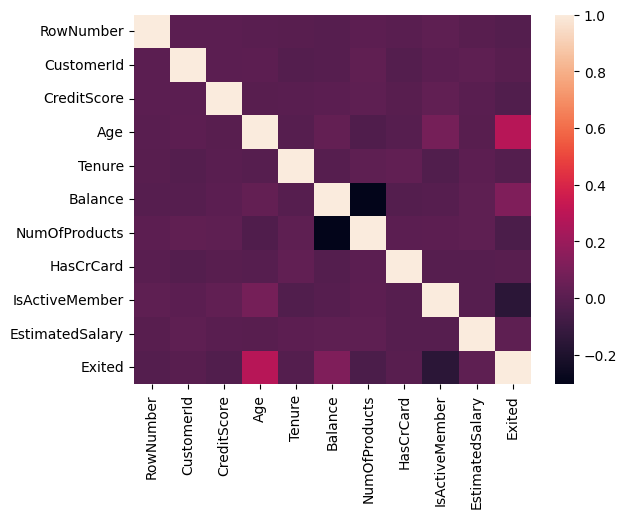

In [36]:
import seaborn as sns
sns.heatmap(dataset.corr())

In [37]:
sns.countplot(x ='churn', data = dataset)

ValueError: Could not interpret input 'churn'

In [ ]:
dataset.dtypes

ValueError: Could not interpret input 'country'

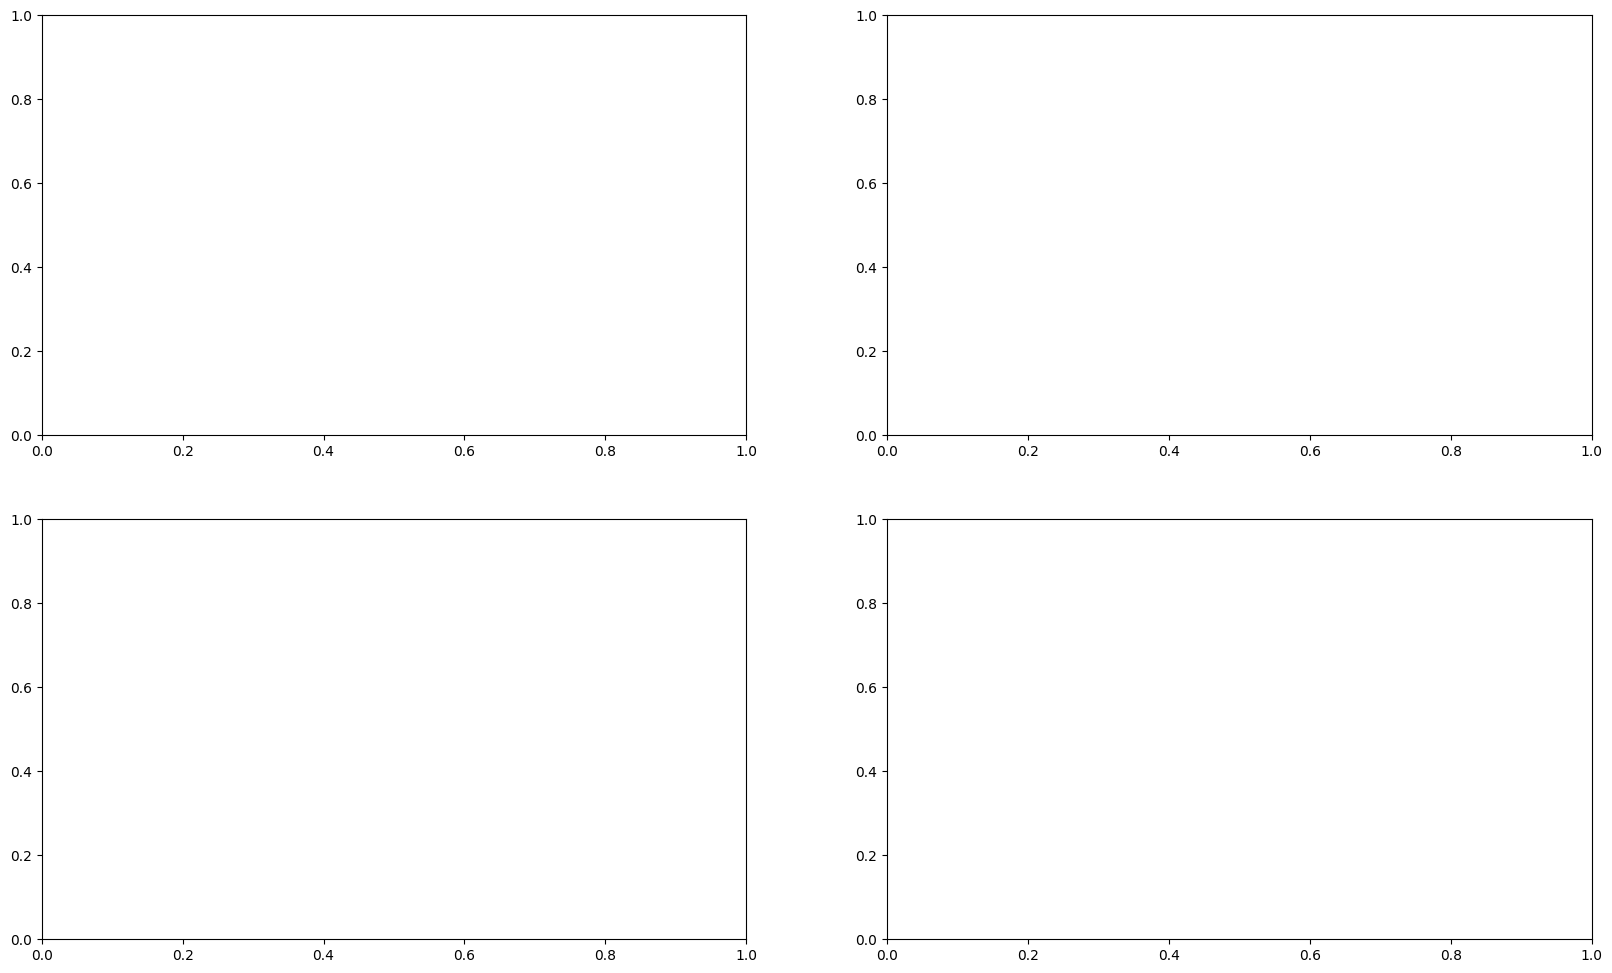

In [38]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(2,2,figsize=(20,12))
sns.countplot(x='country', hue='churn',data=dataset, ax=axarr[0][0])
sns.countplot(x='gender', hue='churn',data=dataset, ax=axarr[0][1])
sns.countplot(x='credit_card', hue='churn',data=dataset, ax=axarr[1][0])
sns.countplot(x='active_member', hue='churn',data=dataset, ax=axarr[1][1])


In [40]:
# fig, axarr = plt.subplots(3, 2, figsize=(20,12))
# sns.boxplot(y='credit_score',x='churn',hue='churn',data=dataset,ax=axarr[0][0])
# sns.boxplot(y='age',x='churn',hue='churn',data=dataset,ax=axarr[0][1])
# sns.boxplot(y='tenure',x='churn',hue='churn',data=dataset,ax=axarr[1][0])
# sns.boxplot(y='balance',x='churn',hue='churn',data=dataset,ax=axarr[1][1])
# sns.boxplot(y='products_number',x='churn',hue='churn',data=dataset,ax=axarr[2][0])
# sns.boxplot(y='estimated_salary',x='churn',hue='churn',data=dataset,ax=axarr[2][1])


In [42]:
dataset['Country'].unique()

KeyError: 'Country'

In [ ]:
dataset.dtypes

In [25]:



## Transform data

#Convert datatypes

dataset['country'] = dataset['country'].astype('category')
dataset['gender'] = dataset['gender'].astype('category')
dataset['estimated_salary'] = dataset['estimated_salary'].astype('float32')
dataset['balance'] = dataset['balance'].astype('float32')

#Change Value in Country column  #Change value in gender column
dataset['country'] = dataset['country'].replace(['Germany'],0)
dataset['country'] = dataset['country'].replace(['France'],1)
dataset['country'] = dataset['country'].replace(['Spain'],3)

## Change value in gender column
dataset['gender'] = dataset['gender'].replace(['Female'],0)
dataset['gender'] = dataset['gender'].replace(['Male'],1)




In [26]:
dataset.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.000000,1,1,1,101348.882812,1
1,15647311,608,3,0,41,1,83807.859375,1,0,1,112542.578125,0
2,15619304,502,1,0,42,8,159660.796875,3,1,0,113931.570312,1
3,15701354,699,1,0,39,1,0.000000,2,0,0,93826.632812,0
4,15737888,850,3,0,43,2,125510.820312,1,1,1,79084.101562,0


In [27]:
dataset.drop(['customer_id'],axis=1, inplace=True)

In [28]:
dataset.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.000000,1,1,1,101348.882812,1
1,608,3,0,41,1,83807.859375,1,0,1,112542.578125,0
2,502,1,0,42,8,159660.796875,3,1,0,113931.570312,1
3,699,1,0,39,1,0.000000,2,0,0,93826.632812,0
4,850,3,0,43,2,125510.820312,1,1,1,79084.101562,0


In [ ]:
x = dataset.drop[]
y